In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models, layers

In [3]:
Image_Size=256
Batch_Size=32

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PatatoLeafDataSet",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 2153 files belonging to 3 classes.


In [5]:
className=dataset.class_names
className

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

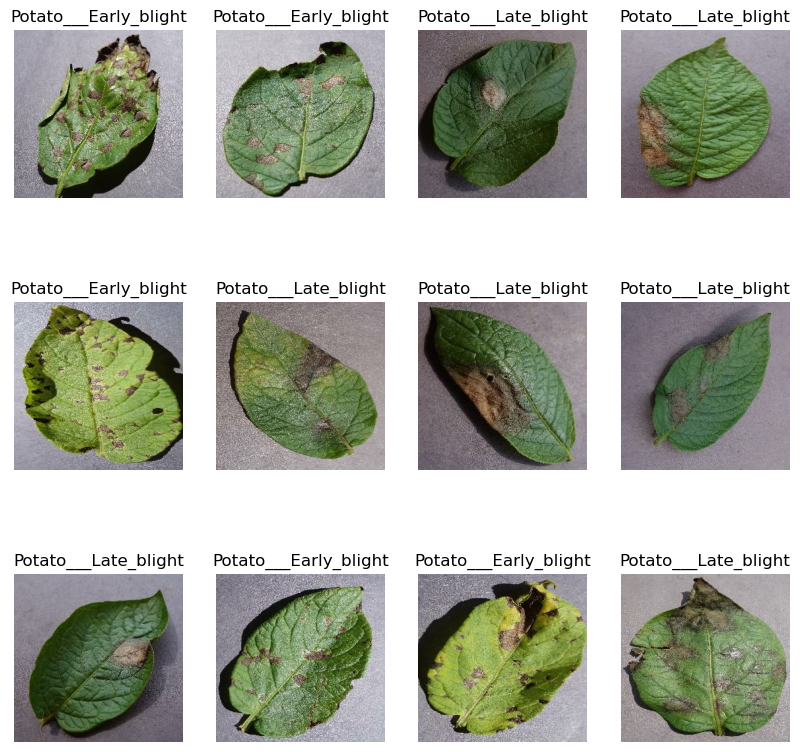

In [6]:
plt.figure(figsize=(10,10))
for batch_Image,batch_lable in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(className[batch_lable[i]])
        plt.imshow(batch_Image[i].numpy().astype("uint8"))
        plt.axis("off")

In [7]:
# calculate Training 80% , Testing 10%  , Validation 10%

In [8]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds=dataset.take(54)
len(train_ds)

54

In [10]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [11]:
valide_size=0.1
len(dataset)*valide_size


6.800000000000001

In [12]:
valide_ds=dataset.take(6)
len(valide_ds)

6

In [13]:
test_ds=test_ds.skip(6)

In [14]:
len(test_ds)

8

In [15]:
def dataset_preprocessing(ds,train_split=0.8, valide_splite=0.1,test_splite=0.1, shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    # print(train_size)
    valide_size=int(valide_splite*ds_size)
    # print(valide_size)
    train_ds=ds.take(train_size)
    valide_ds=ds.skip(train_size).take(valide_size)
    test_ds=ds.skip(train_size).skip(valide_size)
    return train_ds,valide_ds,test_ds

In [16]:
train_ds,valide_ds,test_ds=dataset_preprocessing(dataset)

In [17]:
print(len(train_ds))
print(len(valide_ds))
len(test_ds)

54
6


8

In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valide_ds=valide_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(Image_Size,Image_Size),
    layers.Rescaling(1.0/255)
])

In [20]:
data_agumentation=tf.keras.Sequential([
    layers.RandomFlip("Horizontal_and_Vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1)
])

In [21]:
model = models.Sequential([
    layers.Input(shape=(Image_Size, Image_Size, 3)),

    resize_and_rescale,
    data_agumentation,

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax"),
])


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,752,227 (14.31 MB)

 Trainable params: 3,752,227 (14.31 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [29]:
Batch_Size


32

In [ ]:
model.fit(
    train_ds,
    batch_size=Batch_Size,
    validation_data=valide_ds,
    verbose=1,
    epochs=10
)

Epoch 1/10


C:\Users\Rashid Ali\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\nn.py:1214: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
